In [1698]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import trange

In [1699]:
# single variable linear regression

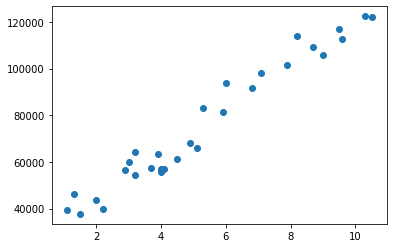

In [1700]:
dataset = pd.read_csv("./datasets/Salary_Data.csv")
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset = dataset.to_numpy()
X, y = dataset[:,0], dataset[:,1]
plt.scatter(X, y)

In [1701]:
from random import uniform

def create_dataset(n_samples=25, spread=3.0, yint=0):
    X = np.array([*range(0, n_samples)])
    y = np.zeros(len(X))
    for i in range(len(X)):
        y[i] = yint + (X[i] + (uniform(-spread, spread)))
    return X, y
#X, y = create_dataset(50, 5, 50)
#plt.scatter(X, y)

In [1702]:
m = len(y)

def predict(h0, h1, x):
    return h0+h1*x

def predictions(h0, h1):
    preds = np.zeros(m)
    for i in range(m):
        preds[i] = predict(h0, h1, X[i])
    return preds

def cost_function(h0, h1):
    preds = predictions(h0, h1)
    costs = np.zeros(m)
    for i in range(m):
        costs[i] = (preds[i]-y[i])**2
    return (1/(m))*np.sum(costs)

def derive_h0(h0, h1):
    H = 0.0000001
    a = cost_function(h0+H, h1)-cost_function(h0, h1)
    return a/H

def derive_h1(h0, h1):
    H = 0.0000001
    a = cost_function(h0, h1+H)-cost_function(h0, h1)
    return a/H

100%|███████████████████████████████████| 15000/15000 [00:02<00:00, 7017.02it/s]


(25750.396102666855, 9456.16576820612)

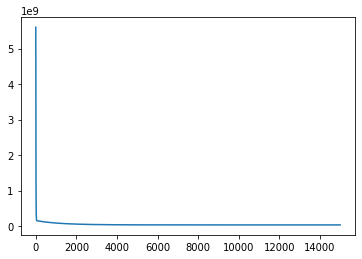

In [1703]:
lr = 0.001

n_epochs = 15000

weight0 = 0
weight1 = 0

losses = []
for epoch in (t := trange(n_epochs)):
    
    temp0 = weight0-derive_h0(weight0, weight1)*lr
    temp1 = weight1-derive_h1(weight0, weight1)*lr
    weight0 = temp0
    weight1 = temp1
    losses.append(cost_function(weight0, weight1))
    
plt.plot(losses)
weight0, weight1

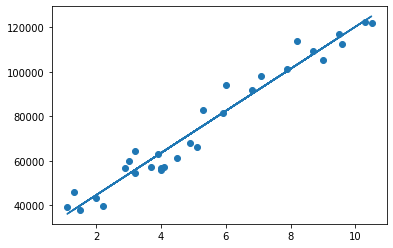

In [1705]:
plt.scatter(X, y)
plt.plot(X, predictions(weight0, weight1))